In [1]:
import math
import numpy as np
import pandas as pd
from numba import njit
from numba import jit
!python -m pip install yfinance
import yfinance as yf
import time
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
plot_width = 15
plot_length = 3
short_lookback = 5
long_lookback = 8

In [3]:
extract_obj = yf.Ticker("AAPL")
data = extract_obj.history(period="1y")
data['Typical Price'] = ((data['High'] + data['Low'] + data['Close']) / 3).round(2)
data = data.iloc[-50:]
price_list = np.array(data['Typical Price'])

In [4]:
#price_list - numpy array list
#lookback - integer
def dm(price_array, lookback):
    out_array = np.array([None for i in range(lookback)])
    for i in range(price_array.size - lookback):
        present_price = math.log(price_array[i+lookback],10)
        lookback_price = math.log(price_array[i],10)
        out_val = (present_price - lookback_price)*1000/lookback
        out_array = np.append(out_array,out_val)
    return out_array


In [5]:
start = time.time()
x1 = dm(price_list,short_lookback)
x2 = dm(price_list,long_lookback)
end = time.time()
print(x1)
function_time = end - start

[None None None None None -0.06503307715526319 -0.21280262922216409
 -2.0003818616538993 -2.340778257616183 -0.6693944349842162
 0.1227994082433348 -0.670177851522169 -2.323259057692262
 0.901212049170752 1.999964269254484 3.189010762260036 3.341678859438524
 5.115181171398309 5.158989628985378 5.869694125194691 4.422221321895847
 4.9069232095319215 3.95124776205682 3.037356858016693 1.4399363151533784
 1.9421212015806155 -0.12375383828180375 -0.032741112521872395
 -1.2192981532585634 -0.11042074685629899 -0.06468972994371214
 0.7463544322257931 0.6849848951645754 1.193395253974483
 -1.1976213870343422 -1.0612927739906297 -3.9327326830329135
 -3.3450885610127656 -3.6102743930344516 -0.9874577460937672
 -3.2435716869326114 -2.3854794693384918 -3.7254601578716517
 -2.4096691961743133 -2.200444060242024 -1.1017900199580488
 0.3883207966604907 0.6600998913445011 1.0898892702842389
 -0.58301685251676]


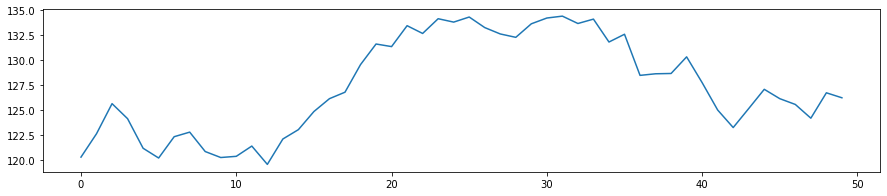

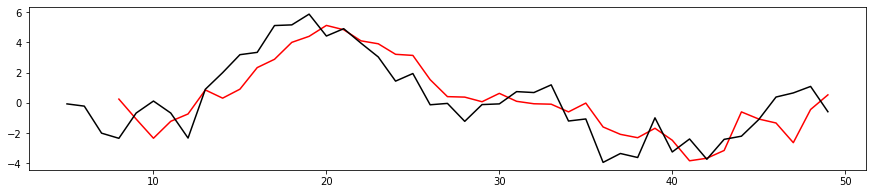

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')
plt.show()

In [7]:
def dm_dm_osc_gen(price_array, short_lookback, long_lookback):
    out_array = np.array([None for i in range(long_lookback)])
    
    def dm(price_array, lookback):
        out_array = np.array([None for i in range(lookback)])
        for i in range(price_array.size - lookback):
            present_price = math.log(price_array[i+lookback],10)
            lookback_price = math.log(price_array[i],10)
            out_val = (present_price - lookback_price)*1000/lookback
            out_array = np.append(out_array,out_val)
        return out_array
    
    out_arr = np.subtract(dm(price_array, short_lookback)[long_lookback:], dm(price_array, long_lookback)[long_lookback:])
    out_array = np.append(out_array,out_arr)
    return out_array

In [8]:
start = time.time()
osc = dm_dm_osc_gen(price_array = price_list, short_lookback = short_lookback, long_lookback = long_lookback)
end = time.time()
print(osc)
oscillator_time = (end-start)

[None None None None None None None None -2.59300316776927
 0.39933969377002887 2.458408454086458 0.5462231280403795
 -1.5923859506973281 0.0450839350639054 1.685719086460824 2.28124941815695
 1.0065441408418807 2.2306945244041643 1.1552426269147542
 1.4680289569529936 -0.7014652594498072 0.06821901570954747
 -0.15279106793878405 -0.8716064539018409 -1.7731397629101031
 -1.1984028986289808 -1.6607433650621894 -0.4477579189446246
 -1.6023117932055908 -0.18765685217714267 -0.6952528976529759
 0.64124142156472 0.7418127262348251 1.2783353312812884
 -0.6036902743848493 -1.0490111532819202 -2.341949112585018
 -1.2665933460947243 -1.309343901295934 0.6901059780054508
 -0.7759422024131601 1.442100803180013 -0.06706571118029192
 0.7339965594290065 -1.6055607253871118 -0.03622212359779553
 1.7167790756196566 3.288770814636943 1.5251419276270273
 -1.1146726531754303]


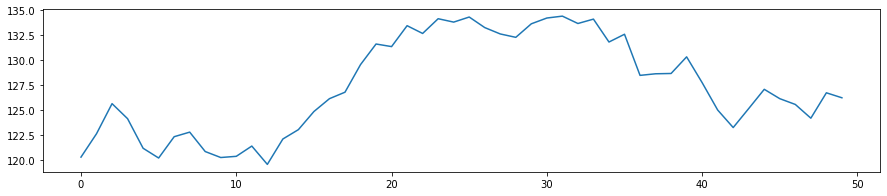

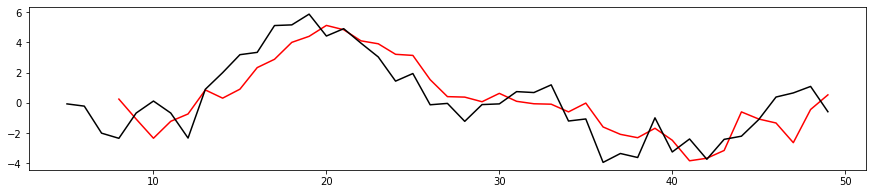

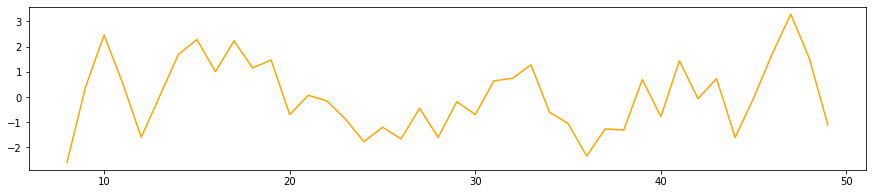

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(osc.size), osc, color = 'orange')
plt.show()

In [10]:
def signal_generation(oscillator_array, long_lookback):
    out_array = np.array([0 for i in range(long_lookback + 1)])
    start_val = long_lookback + 1
    for i in range(start_val, oscillator_array.size):
        append_val = 0
        if (oscillator_array[i] > 0 and oscillator_array[i - 1]  <= 0):
            append_val = oscillator_array[i] - oscillator_array[i - 1]
        elif (oscillator_array[i] < 0 and oscillator_array[i - 1]  >= 0):
            append_val = oscillator_array[i] - oscillator_array[i - 1]
        out_array = np.append(out_array, append_val)
    return out_array

In [11]:
start = time.time()
sign_gen = signal_generation(oscillator_array = osc, long_lookback = long_lookback)
end = time.time()
print(sign_gen)
signal_time = end - start

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          2.99234286  0.          0.
 -2.13860908  1.63746989  0.          0.          0.          0.
  0.          0.         -2.16949422  0.76968428 -0.22101008  0.
  0.          0.          0.          0.          0.          0.
  0.          1.33649432  0.          0.         -1.88202561  0.
  0.          0.          0.          1.99944988 -1.46604818  2.21804301
 -1.50916651  0.80106227 -2.33955728  0.          1.7530012   0.
  0.         -2.63981458]


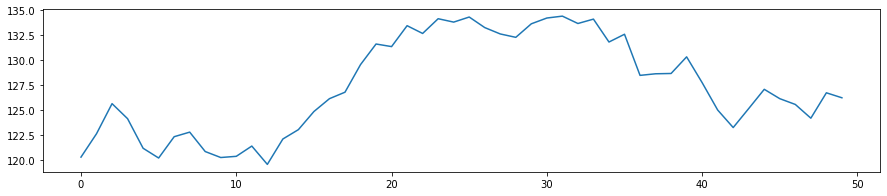

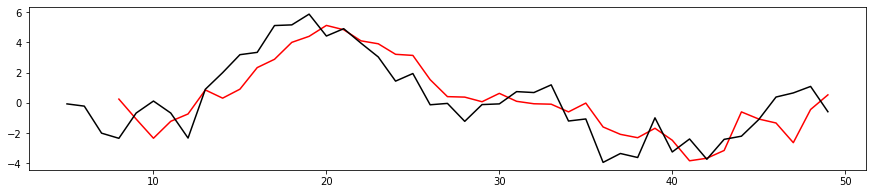

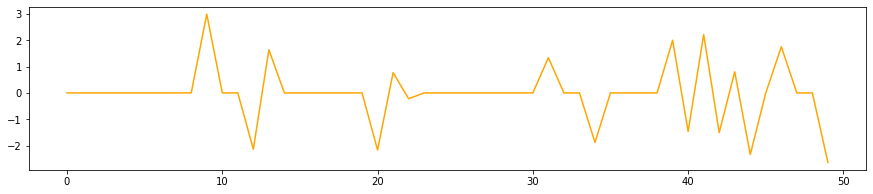

In [12]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

plt.show()

In [13]:
def signum_generation(signal_array, sensitivity = 1.5):
    out_arr = np.empty(0)
    std = np.std(signal_array)
    for i in signal_array:
        append_val = 0
        if (i > std*sensitivity):
            append_val = 100
        elif (i < -std*sensitivity):
            append_val = -100
        out_arr = np.append(out_arr, append_val)
    return out_arr

In [14]:
start = time.time()
signum_gen = signum_generation(sign_gen)
end = time.time()
print(signum_gen)
signum_time = end - start

[   0.    0.    0.    0.    0.    0.    0.    0.    0.  100.    0.    0.
 -100.  100.    0.    0.    0.    0.    0.    0. -100.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. -100.    0.
    0.    0.    0.  100.    0.  100.    0.    0. -100.    0.  100.    0.
    0. -100.]


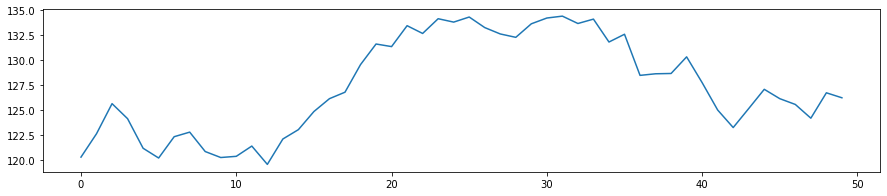

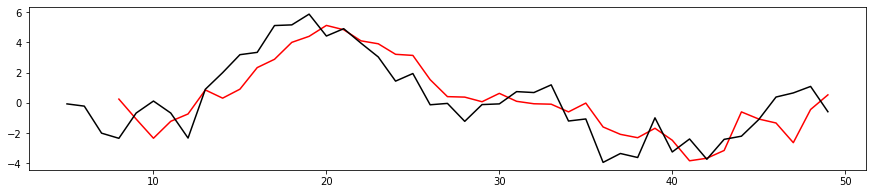

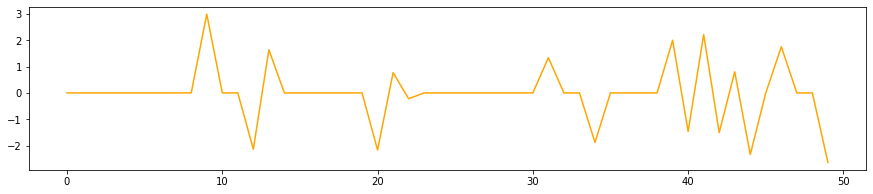

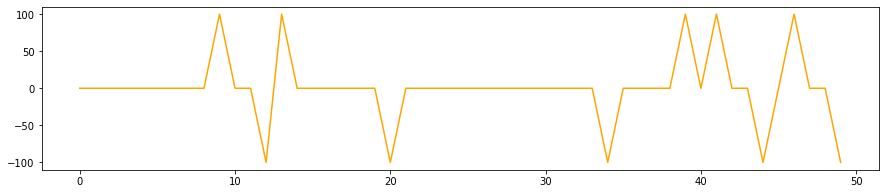

In [15]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

plt.show()

In [16]:
def current_bias(signal_array, signum_array):
    bias = 0
    bias_list = []
    for i,j in zip(signal_array,signum_array):
        if (bias == 0):
            if (j == 100):
                bias = 100
            elif(j == -100):
                bias = -100
        elif(bias == -100):
            if (j == 100 and i > 0):
                bias = 100
            elif(j != 100 and i > 0):
                bias = 0
        elif(bias == 100):
            if (j == -100 and i < 0):
                bias = -100
            elif (j != -100 and i < 0):
                bias = 0
        bias_list.append(bias)
    bias_array = np.array(bias_list)
    return bias_array

In [17]:
start = time.time()
bias_array = current_bias(signal_array = sign_gen, signum_array = signum_gen)
end = time.time()
bias_time = end - start
print(bias_array)

[   0    0    0    0    0    0    0    0    0  100  100  100 -100  100
  100  100  100  100  100  100 -100    0    0    0    0    0    0    0
    0    0    0    0    0    0 -100 -100 -100 -100 -100  100    0  100
    0    0 -100 -100  100  100  100 -100]


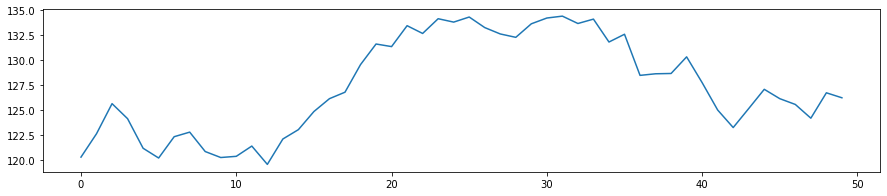

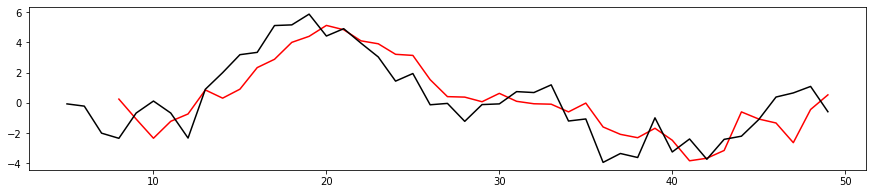

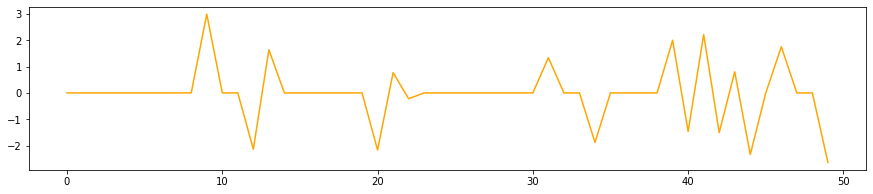

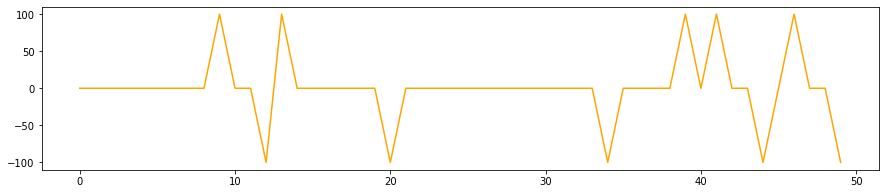

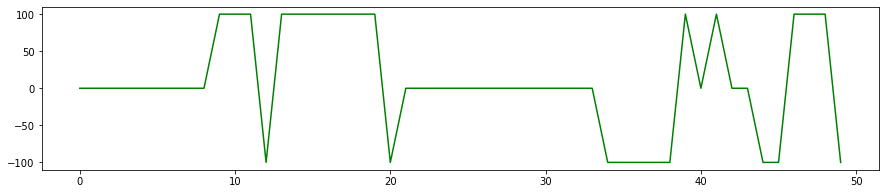

In [18]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

plt.show()

In [19]:
def efficacy_generator (price_array,signum_array, bias_array, stop_loss_percent = 0.3):
    long_book = [0 for i in range(price_array.size)]
    short_book = [0 for i in range(price_array.size)]
    long_pos = []
    short_pos = []
    long_positions = []
    short_positions = []
    long_cash = 0
    short_cash = 0
    stop_loss_flag = False
    short_position_flag = False
    long_position_flag = False
    sub_stop = (max(price_array) - min(price_array))*stop_loss_percent
    
    ctr = 0
    for i,j,k in zip(price_array, bias_array,signum_array):
        if (stop_loss_flag):
            if(k == 100 or k == -100):
                stop_loss_flag = False                 
        elif (stop_loss_flag == False  and short_position_flag == False and long_position_flag == False):
            if(j == 100):
                long_position_flag = True
                long_pos.append(i)
                long_book[ctr] = i
            elif(j == -100):
                short_position_flag = True
                short_pos.append(i)
                short_book[ctr] = i
        elif(stop_loss_flag == False  and short_position_flag == True):
            short_pos.append(i)
            short_book[ctr] = i
            if (i > (min(short_pos) + sub_stop)):
                short_position_flag = False
                stop_loss_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 100):
                short_position_flag = False
                long_position_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 0):
                short_position_flag = False
                short_positions.append(short_pos)
                short_pos = []
        elif(stop_loss_flag == False and long_position_flag == True):
            long_pos.append(i)
            long_book[ctr] = i
            if (i < (max(long_pos) - sub_stop)):
                long_position_flag = False
                stop_loss_flag = True
                long_positions.append(long_pos)
                long_pos = []
            elif (j == 0):
                long_position_flag = False
                long_positions.append(long_pos)
                long_pos = []
            elif(j == -100):
                long_position_flag = False
                short_position_flag = True
                long_positions.append(long_pos)
                long_pos = []
                
        ctr += 1
        
    if (long_pos != []):
        long_positions.append(long_pos)
    if (short_pos != []):
        short_positions.append(short_pos)
    
    for i in long_positions:
        long_cash += (i[-1] - i[0])
    for i in short_positions:
        short_cash += (i[0] - i[-1])
    
    out = (long_cash+short_cash)/sub_stop
    print(out)
    return long_book,short_book

In [20]:
start = time.time()
test = efficacy_generator(price_array = price_list, signum_array = signum_gen, bias_array = bias_array)
end = time.time()
efficacy_time = end - start
print(test)

2.4513096037609112
([0, 0, 0, 0, 0, 0, 0, 0, 0, 120.21, 120.33, 121.36, 119.52, 0, 123.01, 124.83, 126.12, 126.77, 129.54, 131.61, 131.35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 127.73, 124.98, 123.22, 0, 0, 0, 0, 124.16, 126.71, 126.21], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 122.07, 0, 0, 0, 0, 0, 0, 0, 133.45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 131.81, 132.59, 128.46, 128.62, 128.65, 130.32, 0, 0, 0, 0, 127.06, 126.12, 125.54, 0, 0, 0])


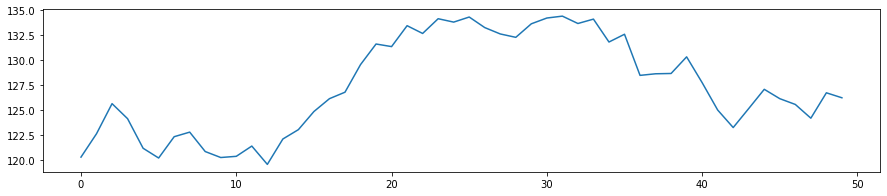

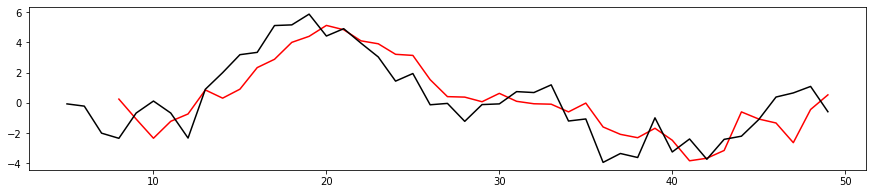

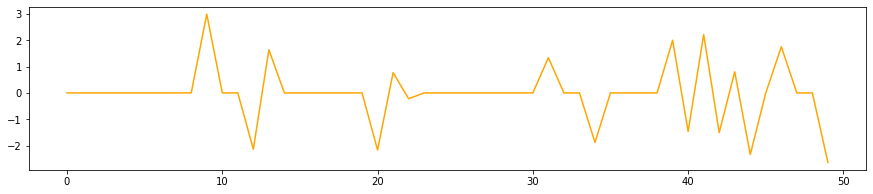

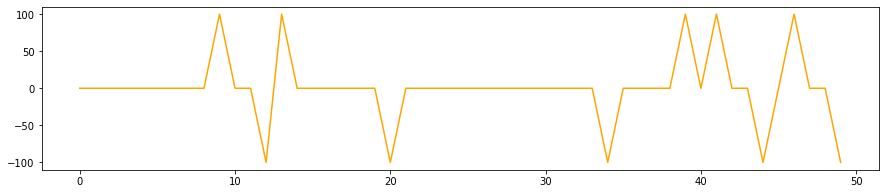

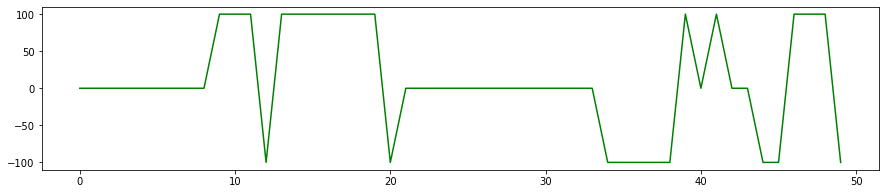

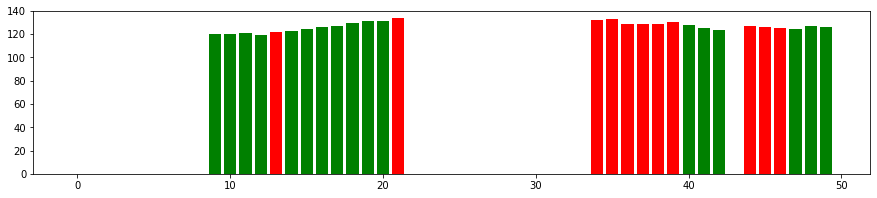

In [21]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

figure(figsize=(plot_width, plot_length))
ax6 = plt.subplot()
plt.bar(np.arange(bias_array.size), test[0], color = 'green')
plt.bar(np.arange(bias_array.size), test[1], color = 'red')

plt.show()

In [22]:
print(
    "Diagnostics \n" +
    "Function Load Time: " + str(function_time) + "\n" + 
    "Oscillator Load Time: " + str(oscillator_time) + "\n" + 
    "Signal Load Time: " + str(signal_time) + "\n" + 
    "Signum Load Time: " + str(signum_time) + "\n" 
    "Bias Load Time: " + str(bias_time) + "\n" + 
    "Efficacy Value Load time: " + str(efficacy_time) + "\n"
    "Total Time: " + str(function_time+oscillator_time+signal_time+signum_time+bias_time+efficacy_time)
    )

Diagnostics 
Function Load Time: 0.00500035285949707
Oscillator Load Time: 0.003991842269897461
Signal Load Time: 0.0019958019256591797
Signum Load Time: 0.0029993057250976562
Bias Load Time: 0.000995635986328125
Efficacy Value Load time: 0.0009984970092773438
Total Time: 0.015981435775756836
